<a href="https://colab.research.google.com/github/Amantyagidatascientist/EDA-project/blob/main/Web_Scraping_GitHub_Topics_and_Repositories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Web Scraping GitHub Topics and Repositories**



# Introduction of the web scraping
Web scraping is the process of extracting data from websites. It involves fetching the HTML of a web page, parsing it, and extracting desired information. Web scraping is often used for tasks like data collection and automation. However, it's essential to consider ethical considerations and comply with website terms of service while engaging in web scraping activities


# Requirements
Python 3.x

requests library

beautifulsoup4 library

pandas library

# Project Overview
This project focuses on automating the extraction of information about GitHub topics and their top repositories using web scraping techniques. Leveraging Python with requests, BeautifulSoup, and pandas, the script aims to streamline the process of discovering trending topics and relevant repositories within the GitHub ecosystem.


# Problem Statement
Information Retrieval: Simplify the process of obtaining details about popular GitHub topics and repositories.

Data Organization: Systematically structure and store extracted data for efficient analysis.

Efficiency and Automation: Automate web scraping to eliminate manual data collection efforts.

Data Availability: Provide users with accessible CSV files containing extracted information.

# Outline
- we scraping the https://github.com/topics
- we'll get a list of topics.For each topic, we'll get topic title,
topic page URL and topic Description
- for each topic we'll get the top 25 repositories in the topic from the topic page
- For each topic,we'll grab the repo name,username,stars and
repo URL
- For each topic we'll create a csv file in the following format:

# **Use the requests library to download web pages**

In [171]:
import requests

In [172]:
topic_url='https://github.com/topics'
request=requests.get(topic_url)
request.status_code

200

In [173]:
webpagedata=request.text

In [174]:
with open('webpage.html' ,'w') as f:
  f.write(webpagedata)

# **Use Beautiful Soup to parse and extract information**

In [175]:
from bs4 import BeautifulSoup

# We scrape data from the list of topics on GitHub.

In [176]:
soup=BeautifulSoup(webpagedata,'html.parser')

In [177]:
# we scrape the titles of the topics on the page.
p_topic=soup.find_all('p',class_="f3 lh-condensed mb-0 mt-1 Link--primary")
list_topic=[]
for i in range(len(p_topic)):
  list_topic.append(p_topic[i].text)
print(list_topic)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [178]:
# we scrape the datathen the associated links.
p_desc=soup.find_all('p',class_='f5 color-fg-muted mb-0 mt-1')
list_disc=[]
for i  in range(len(p_desc)):
  new_string=(p_desc[i].text).strip()
  list_disc.append(new_string)
print(list_disc)

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.', 'Angular is an open source web application platform.', 'Ansible is a simple and powerful automation engine.', 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.', 'Arduino is an open source platform for building electronic devices.', 'ASP.NET is a web framework for building modern web apps and services.', 'Atom is a open source text editor built with web technologies.', 'An awesome list is a list of awesome things curated by the community.', 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.', 'Azure is a cloud co

In [179]:
#  we scrape the description of the topics on the page
link_p_topic=soup.find_all('a',class_='no-underline flex-1 d-flex flex-column')
list_link=[]
for i in range(len(link_p_topic)):
  new_link="https://github.com/" + link_p_topic[i]['href']
  list_link.append(new_link)
print(list_link)

['https://github.com//topics/3d', 'https://github.com//topics/ajax', 'https://github.com//topics/algorithm', 'https://github.com//topics/amphp', 'https://github.com//topics/android', 'https://github.com//topics/angular', 'https://github.com//topics/ansible', 'https://github.com//topics/api', 'https://github.com//topics/arduino', 'https://github.com//topics/aspnet', 'https://github.com//topics/atom', 'https://github.com//topics/awesome', 'https://github.com//topics/aws', 'https://github.com//topics/azure', 'https://github.com//topics/babel', 'https://github.com//topics/bash', 'https://github.com//topics/bitcoin', 'https://github.com//topics/bootstrap', 'https://github.com//topics/bot', 'https://github.com//topics/c', 'https://github.com//topics/chrome', 'https://github.com//topics/chrome-extension', 'https://github.com//topics/cli', 'https://github.com//topics/clojure', 'https://github.com//topics/code-quality', 'https://github.com//topics/code-review', 'https://github.com//topics/compi

In [180]:
# We convert all the scraped data into a DataFrame
import pandas as pd
gethub_topic=pd.DataFrame({'Topic':list_topic,'Description':list_disc,'link':list_link})
gethub_topic

,Topic,Description,link
0,3D,3D refers to the use of three-dimensional grap...,https://github.com//topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com//topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com//topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com//topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com//topics/android
5,Angular,Angular is an open source web application plat...,https://github.com//topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com//topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com//topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com//topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com//topics/aspnet


# **Create CSV file(s) with the extracted information**

In [181]:
gethub_topic.to_csv("gethubdata.csv")

# **Getting information out of a topic page**

In [182]:
# We start by scraping the page for the top topic name and link .
# Afterward, we use the link of the topic to scrape the entire page for that specific topictopic_url_link=list_link[1]
topic_url_link=list_link[1]

In [183]:
response=requests.get(topic_url_link)
response.status_code

200

In [184]:
# we scrape the one repositories, extracting information such as the repository name, username, star count, and repository
soup_page=BeautifulSoup(response.text,'html.parser')

In [185]:
h3_tag=soup_page.find_all('h3',class_='f3 color-fg-muted text-normal lh-condensed')

In [186]:
a_tag_data=h3_tag[0].find_all('a')

In [187]:
a_tag_data[0].text.strip()

'ljianshu'

In [188]:
a_tag_data[1].text.strip()

'Blog'

In [189]:
base_url='https://github.com'
link_url=base_url+a_tag_data[1]['href']
print(link_url)

https://github.com/ljianshu/Blog


In [190]:
star_tag=soup_page.find_all('span',class_="Counter js-social-count")

In [191]:
def parse_star_count(star_str):
  if star_str[-1]=='k':
    num=float(star_str[:-1])*1000
    return int(num)
  return int(star_str)
parse_star_count(star_tag[0].text.strip())

7800

In [192]:
def get_repo_info(h3_tag,star_tag):
  tag_a_data=h3_tag.find_all('a')
  username=tag_a_data[0].text.strip()
  repo_name=tag_a_data[1].text.strip()
  repo_link=base_url+tag_a_data[1]['href']
  stars=parse_star_count(star_tag.text.strip())
  return username,repo_name,repo_link,stars

In [193]:
topic_repos_dict={'username':[],'repo_name':[],'stars':[],'repo_link':[]}

In [194]:
for i in range(len(h3_tag)):
  repo_info=get_repo_info(h3_tag[i],star_tag[i])
  topic_repos_dict['username'].append(repo_info[0])
  topic_repos_dict['repo_name'].append(repo_info[1])
  topic_repos_dict['repo_link'].append(repo_info[2])
  topic_repos_dict['stars'].append(repo_info[3])

In [195]:
page_data=pd.DataFrame(topic_repos_dict)
page_data

,username,repo_name,stars,repo_link
0,ljianshu,Blog,7800,https://github.com/ljianshu/Blog
1,metafizzy,infinite-scroll,7400,https://github.com/metafizzy/infinite-scroll
2,olifolkerd,tabulator,6100,https://github.com/olifolkerd/tabulator
3,developit,unfetch,5700,https://github.com/developit/unfetch
4,jquery-form,form,5200,https://github.com/jquery-form/form
5,Studio-42,elFinder,4500,https://github.com/Studio-42/elFinder
6,elbywan,wretch,4400,https://github.com/elbywan/wretch
7,dwyl,learn-to-send-email-via-google-script-html-no-...,3100,https://github.com/dwyl/learn-to-send-email-vi...
8,ded,reqwest,2900,https://github.com/ded/reqwest
9,wendux,ajax-hook,2500,https://github.com/wendux/ajax-hook


1. Get the list of topics from the topics page
2. Get the list of top repos from the individual topic pages
3. For each topic, create a CSV of the top repos for the topic

In [196]:
# We use the os module to change the path of the file. First, we create a new directory.
# Then, we change the path to the newly created directory
import os
path="/content/"
os.mkdir(path+"github_topice")
os.chdir(path+"github_topice")

In [197]:
# We use the image in the notebook show the web scraping Image
from google.colab import files
from IPython.display import Image


In [207]:
# upload=files.upload()

Saving Screenshot 2024-02-26 124320.png to Screenshot 2024-02-26 124320.png


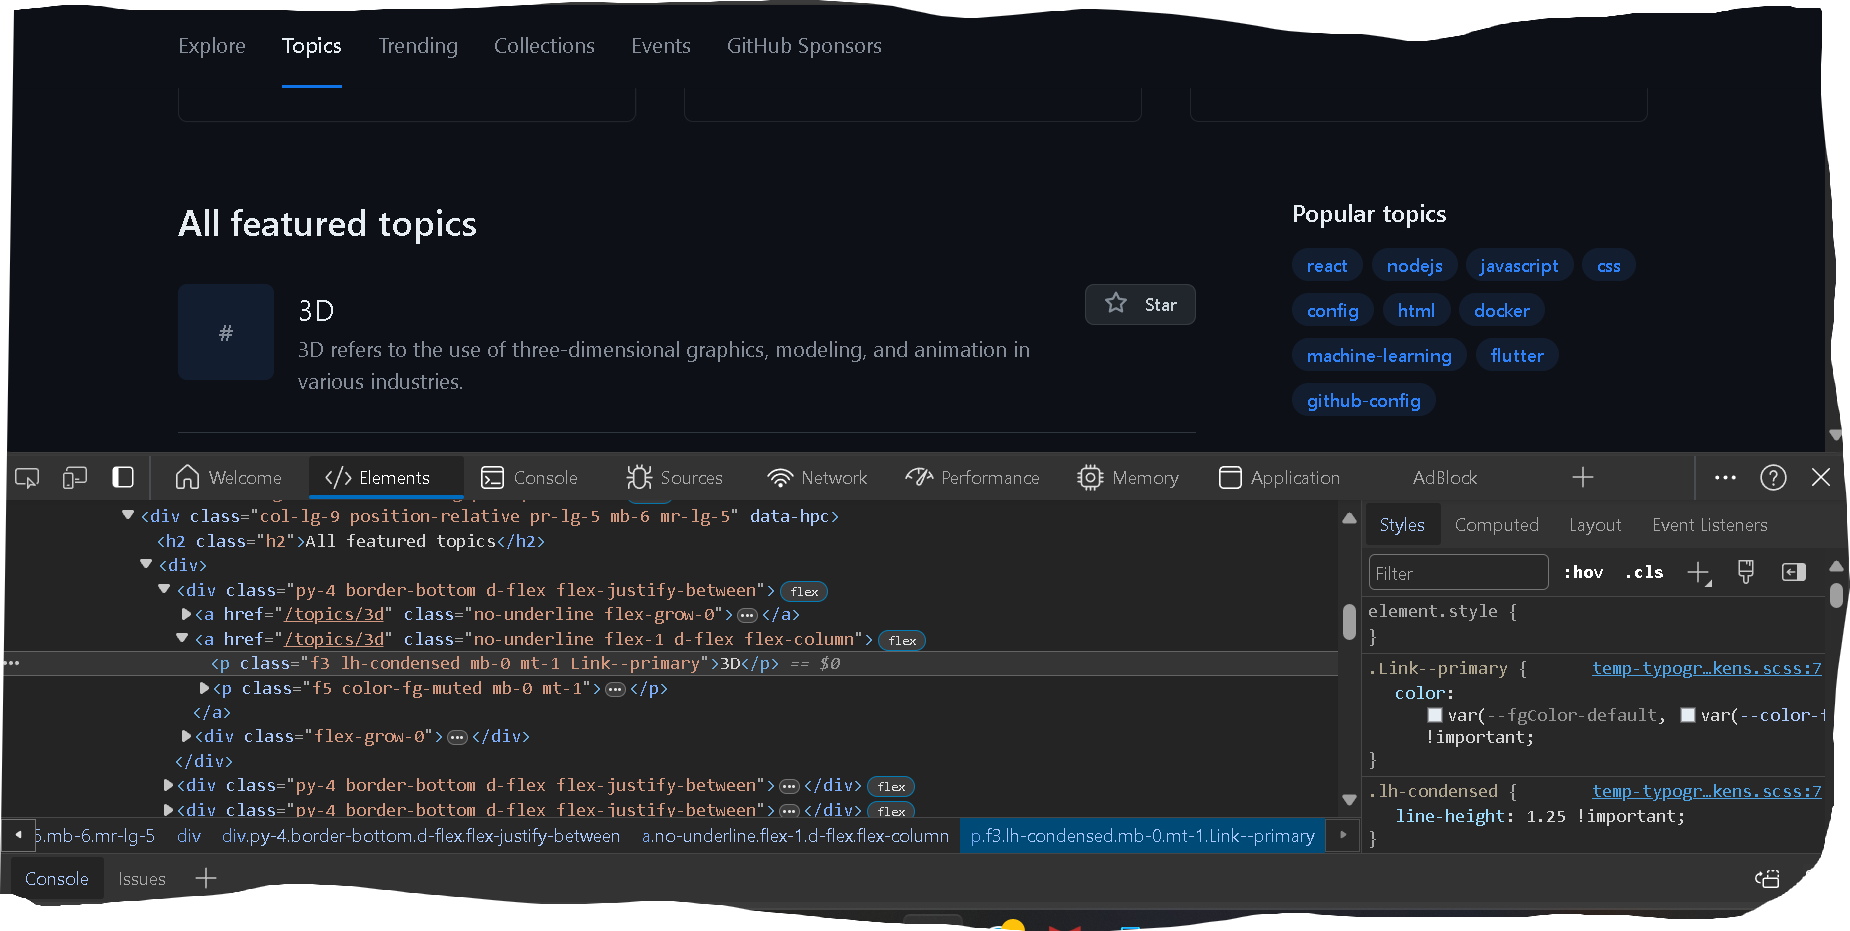

In [208]:
Image("Screenshot 2024-02-26 124320.png",width=1100)

In [199]:
def scrape_topics():
  topics_url='https://github.com/topics'
  request=requests.get(topics_url)

  if request.status_code !=200:
    raise Exception('failed to load page {}'.format(topics_url))
  soup=BeautifulSoup(request.text,'html.parser')

  p_topic=soup.find_all('p',class_="f3 lh-condensed mb-0 mt-1 Link--primary")
  p_desc=soup.find_all('p',class_='f5 color-fg-muted mb-0 mt-1')
  link_p_topic=soup.find_all('a',class_='no-underline flex-1 d-flex flex-column')

  list_link=[]
  list_topic=[]
  list_disc=[]

  for i in range(len(p_topic)):
      list_topic.append(p_topic[i].text)
      new_string=(p_desc[i].text).strip()
      list_disc.append(new_string)
      new_link="https://github.com/" + link_p_topic[i]['href']
      list_link.append(new_link)
  topics_dict={'title':list_topic,'description':list_disc,'url':list_link}
  return pd.DataFrame(topics_dict)
scrape_topics()

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com//topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com//topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com//topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com//topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com//topics/android
5,Angular,Angular is an open source web application plat...,https://github.com//topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com//topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com//topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com//topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com//topics/aspnet


In [211]:
upload=files.upload()

Saving Screenshot 2024-02-26 124240.png to Screenshot 2024-02-26 124240.png


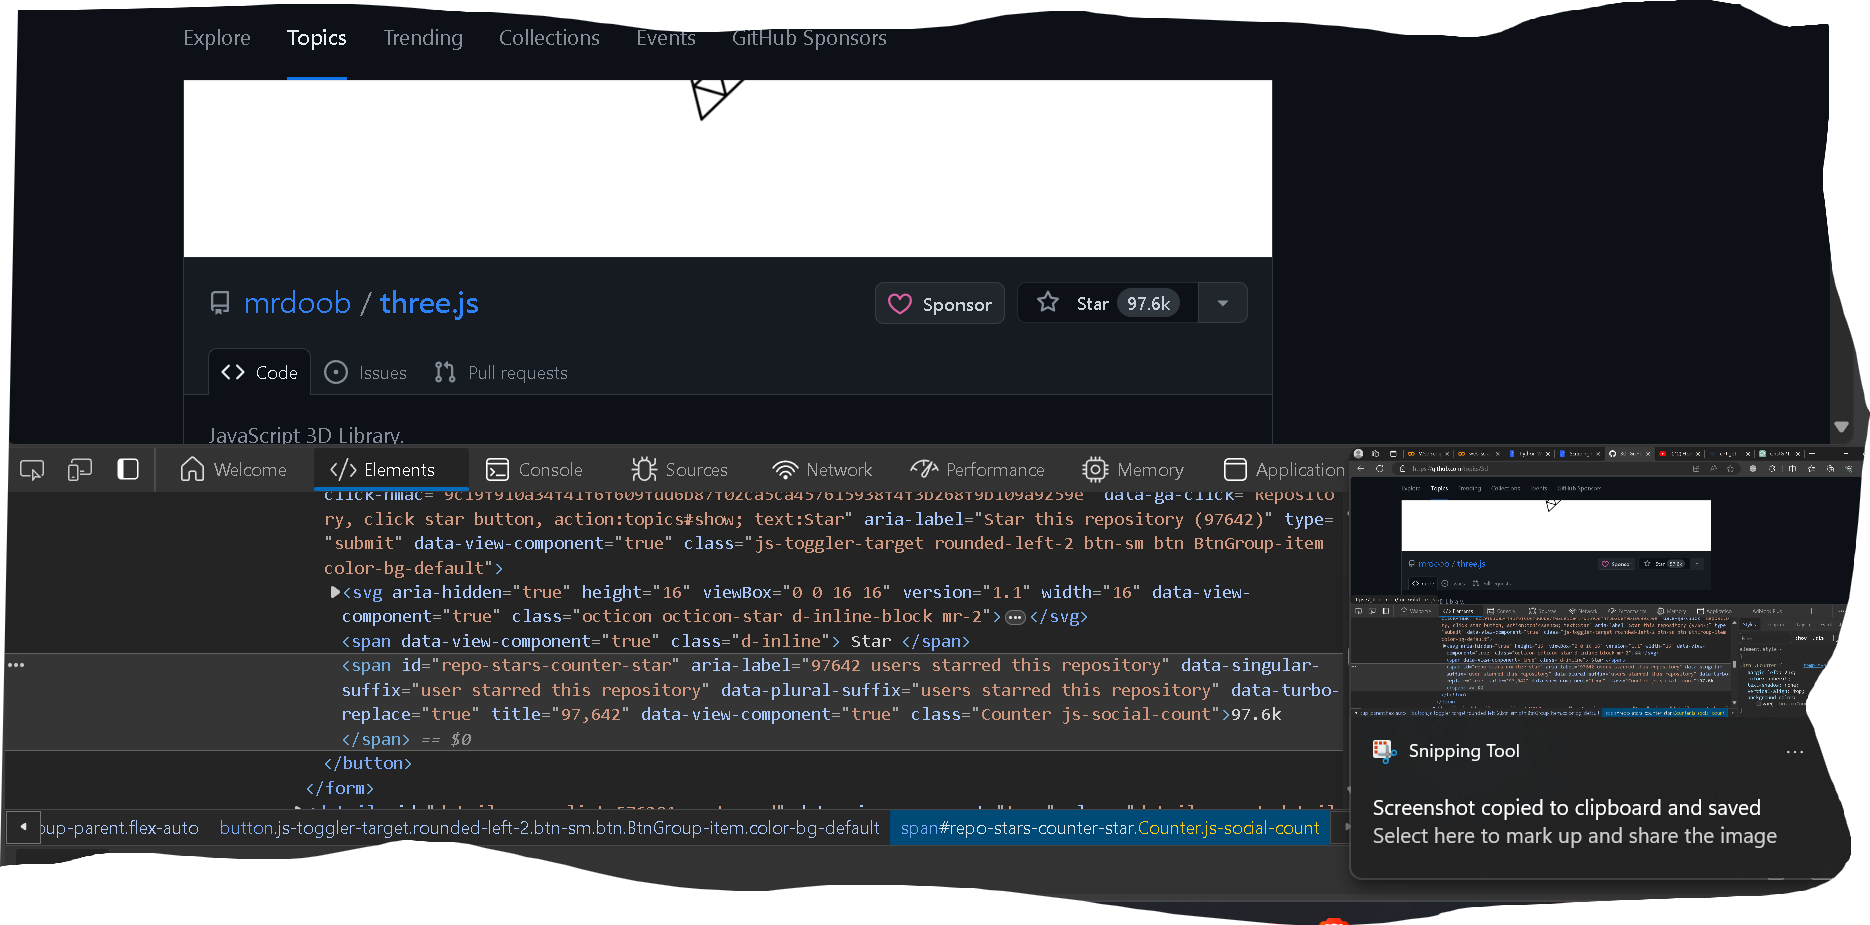

In [212]:
Image("Screenshot 2024-02-26 124240.png",width=1100)

In [201]:
def get_topic_repo(topic_link):
  response=requests.get(topic_link)
  if response.status_code !=200:
    raise Exception('failed to load page {}'.format(topic_link))

  soup_page=BeautifulSoup(response.text,'html.parser')
  h3_tag=soup_page.find_all('h3',class_='f3 color-fg-muted text-normal lh-condensed')
  star_tag=soup_page.find_all('span',class_="Counter js-social-count")

  topic_repos_dict={'username':[],'repo_name':[],'stars':[],'repo_link':[]}

  for i in range(len(h3_tag)):
     repo_info=get_repo_info(h3_tag[i],star_tag[i])
     topic_repos_dict['username'].append(repo_info[0])
     topic_repos_dict['repo_name'].append(repo_info[1])
     topic_repos_dict['repo_link'].append(repo_info[2])
     topic_repos_dict['stars'].append(repo_info[3])
  return pd.DataFrame(topic_repos_dict)
print(pd.DataFrame(topic_repos_dict))

                  username                                          repo_name  \
0                 ljianshu                                               Blog   
1                metafizzy                                    infinite-scroll   
2               olifolkerd                                          tabulator   
3                developit                                            unfetch   
4              jquery-form                                               form   
5                Studio-42                                           elFinder   
6                  elbywan                                             wretch   
7                     dwyl  learn-to-send-email-via-google-script-html-no-...   
8                      ded                                            reqwest   
9                   wendux                                          ajax-hook   
10                LeaVerou                                              bliss   
11                noelboss  

In [202]:
def scapr_topic(topic_link,topic_name):
  fname=topic_name + '.csv'
  if os.path.exists(fname):
    print("the file{} already exists.skipping...".format(fname))
    return
  topic_df=get_topic_repo(topic_link)
  topic_df.to_csv(topic_name+'csv',index=None)

In [203]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df=scrape_topics()
    for index,row in topics_df.iterrows():
      print('Scraping top repositories from {}'.format(row['title']))
      scapr_topic(row['url'],row['title'])

In [204]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories from 3D
Scraping top repositories from Ajax
Scraping top repositories from Algorithm
Scraping top repositories from Amp
Scraping top repositories from Android
Scraping top repositories from Angular
Scraping top repositories from Ansible
Scraping top repositories from API
Scraping top repositories from Arduino
Scraping top repositories from ASP.NET
Scraping top repositories from Atom
Scraping top repositories from Awesome Lists
Scraping top repositories from Amazon Web Services
Scraping top repositories from Azure
Scraping top repositories from Babel
Scraping top repositories from Bash
Scraping top repositories from Bitcoin
Scraping top repositories from Bootstrap
Scraping top repositories from Bot
Scraping top repositories from C
Scraping top repositories from Chrome
Scraping top repositories from Chrome extension
Scraping top repositories from Command line interface
Scraping top repositories from Clojure
Scraping top repositories from 

# **Document and share your work**

# 1. scrape_topics
 This function scrapes information about GitHub topics from the GitHub Topics page. It extracts the title, description, and URL for each topic.

# 2. get_repo_info
This function is a placeholder for extracting information about a GitHub repository from the HTML tags containing the repository name (h3 tag) and stars count (span tag). Modify this function according to the actual structure of the GitHub page.

# 3. get_topic_repo
This function takes a GitHub topic URL, sends an HTTP request, and extracts information about the top repositories related to that topic using the get_repo_info function.

# 4. scrape_topic
This function is responsible for saving the repository information to a CSV file named after the topic. If the file already exists, it skips the process.

# 5. scrape_topics_repos
This function orchestrates the entire scraping process. It first scrapes the list of topics using scrape_topics and then iterates over each topic, calling scrape_topic to get and save repository information

# Notes -
Web scraping should be performed ethically and in compliance with the terms of service of the website being scraped.
The code assumes a specific HTML structure on GitHub's website. If GitHub updates its structure, the code may need adjustments.